In [1]:
import numpy as np
from numba import jit
import matplotlib
import matplotlib.pyplot as plt
import imageio

In [29]:
@jit
def mandelbrot(c,maxiter):

    z = c
    for n in range(maxiter):
        if abs(z) > 3:
            return n
        # z = np.sin(z)**2 + z**2 + c
        z = np.exp(z*c)**2
        # z = 1/(z+c)**3
    return 0

In [30]:
@jit
def mandelbrot_set(xmin,xmax,ymin,ymax,width,height,maxiter):
    r1 = np.linspace(xmin, xmax, width)
    r2 = np.linspace(ymin, ymax, height)
    n3 = np.empty((width,height))
    for i in range(width):
        for j in range(height):
            n3[i,j] = mandelbrot(r1[i] + 1j*r2[j],maxiter)
    return (r1,r2,n3)

In [31]:
from matplotlib import pyplot as plt
from matplotlib import colors
%matplotlib inline
 
def mandelbrot_image(savestring,xmin,xmax,ymin,ymax,width=20,height=20,maxiter=100):
    cmap = 'hot'
    dpi = 20
    img_width = dpi * width
    img_height = dpi * height
    x,y,z = mandelbrot_set(xmin,xmax,ymin,ymax,img_width,img_height,maxiter)
    
    fig, ax = plt.subplots(figsize=(width, height),dpi=dpi)
    plt.axis('off')
    ax.imshow(z.T,cmap=cmap,origin='lower')
#     ax.imshow(z.T,origin='lower')
    plt.tight_layout()
    plt.savefig(savestring)

def mandelbrot_image_anim(zoom,savestring,x,y,dx,dy,width=10,height=10,maxiter=500):
    cmap = 'hot'
    dpi = 200
    img_width = dpi * width
    img_height = dpi * height
    x,y,z = mandelbrot_set(x-dx/zoom,x+dx/zoom,y-dy/zoom,y+dy/zoom,img_width,img_height,maxiter)
    
    fig, ax = plt.subplots(figsize=(width, height),dpi=dpi)
    plt.axis('off')
    ax.imshow(z.T,cmap=cmap,origin='lower')
    

    # Used to return the plot as an image rray
    fig.canvas.draw()       # draw the canvas, cache the renderer
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    print(zoom)

    return image
#
    

    

    


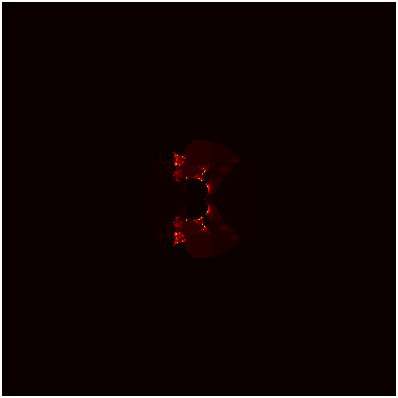

In [32]:
x = 0
y = 0
dx = 10
dy = dx

mandelbrot_image('test2.png',x-dx,x+dx,y-dy,y+dy)

# x = -0.74898999
# y = 0.1004202
# dx = 1.5
# dy = dx
# zooms = np.logspace(0,8,200)
# maxiters = np.round(np.linspace(50,2000,200))

# kwargs_write = {'fps':30.0, 'quantizer':'nq'}
# imageio.mimsave('./Zoom4.gif', [mandelbrot_image_anim(zooms[i],"ClassicMandelbrot.png",x,y,dx,dy,maxiter=maxiters[i]) for i in range(len(zooms))], fps=15)






1.0
1.1242100350620865
1.263848202934298
1.4208308325339223
1.5973122800602544
1.7957144943716399
2.0187602546790386
2.269510536694669
2.5514065200312888
2.868316813342011
3.2245905452963948
3.6251170499885332
4.075392965871777
4.581597669054491
5.150678076168124
5.790443980602488
6.50967523045817
7.318242219076176
8.22724134170047
9.249147277217336
10.3979841848149


/Users/ndrach1/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


11.689518164985783
13.141473626117568
14.773776525985111
16.608827826277157
18.671810912919206
20.991037201085547
23.59833466782195
26.529484644318973
29.824712862168912
33.52924149249558
37.69390975388362
42.37587160604063
47.63938010401343
53.55666917706899
60.208944933361316
67.68750009458535
76.0949668545988
85.54672535565685
96.17248711152965
108.11807510766077
121.54742500762872
136.64483492953258
153.6174946671828
172.6983290659436
194.14919457438816
218.26447283974872
245.37511066398193
275.85316176291843
310.1168926574779
348.63652276780874
391.94067748472213
440.6236427773573
495.3535208959175
556.8813990945273
626.0516572014822
703.8135554931562
791.2342618981327
889.5134973108236
1000.0


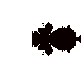

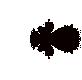

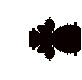

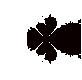

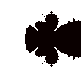

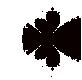

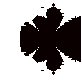

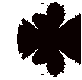

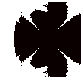

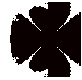

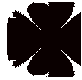

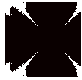

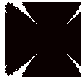

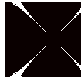

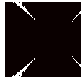

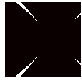

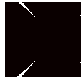

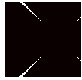

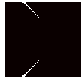

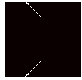

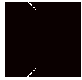

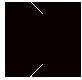

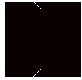

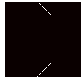

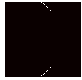

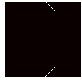

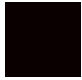

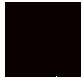

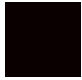

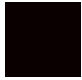

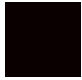

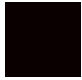

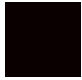

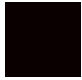

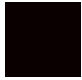

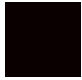

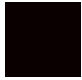

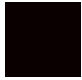

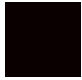

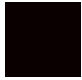

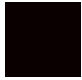

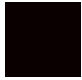

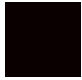

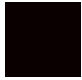

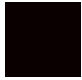

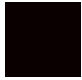

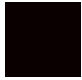

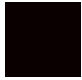

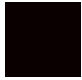

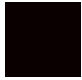

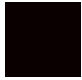

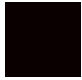

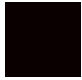

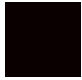

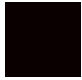

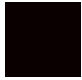

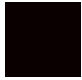

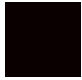

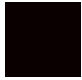

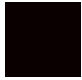

In [55]:
x = -1.4
y = 0
dx = 2
dy = dx
# a = mandelbrot_image_anim(1,"ClassicMandelbrot.png",x,y,dx,dy)
zooms = np.logspace(0,3,60)

kwargs_write = {'fps':30.0, 'quantizer':'nq'}
imageio.mimsave('./Zoom5.gif', [mandelbrot_image_anim(i,"ClassicMandelbrot.png",x,y,dx,dy) for i in zooms], fps=7)

In [620]:
c = 0.5+0.5j
mandelbrot(c,1000)

4

In [629]:
c = -0.5 + 0.5j
mandelbrot(c,1000)

0

## Make Animations

In [694]:
x = -1.4012
y = 0.0
zoom = np.lispace(0.1,2,50)

# dx = 2
dy = zoom
 
mandelbrot_image_anim(zoom,"ClassicMandelbrot.png",x-dx,x+dx,y-dy,y+dy)

AttributeError: module 'numpy' has no attribute 'lispace'

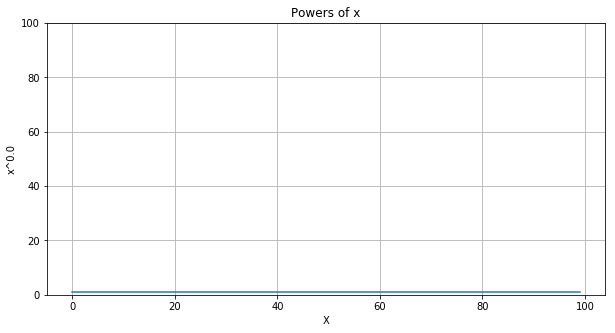

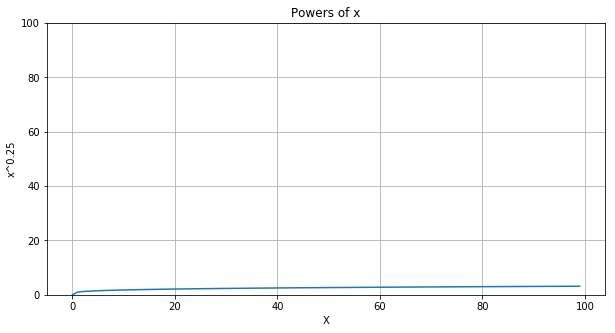

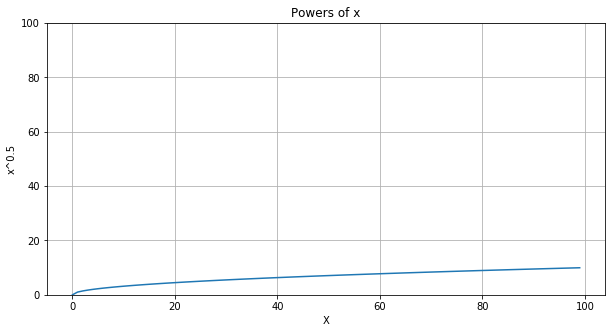

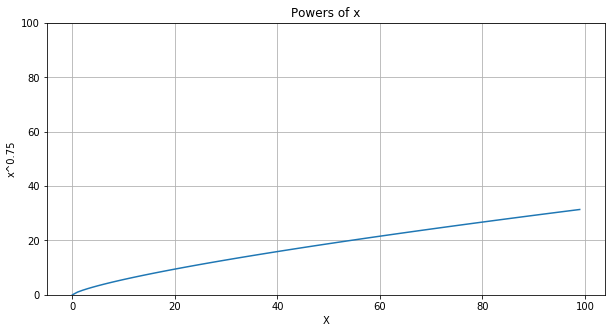

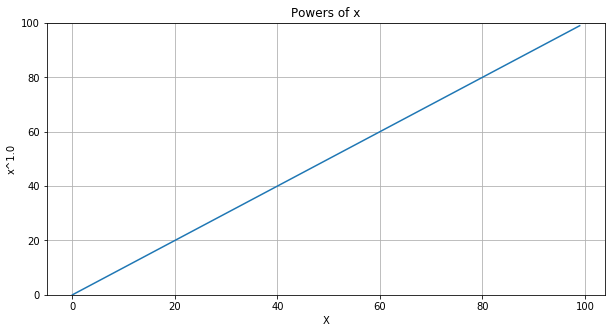

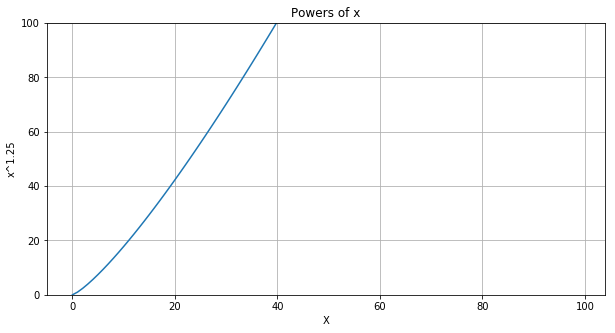

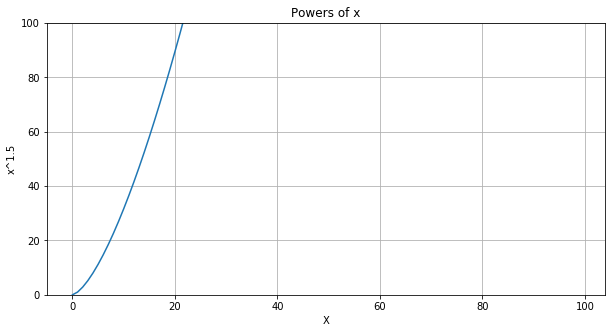

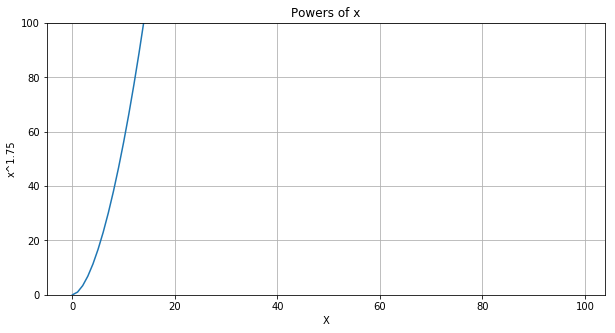

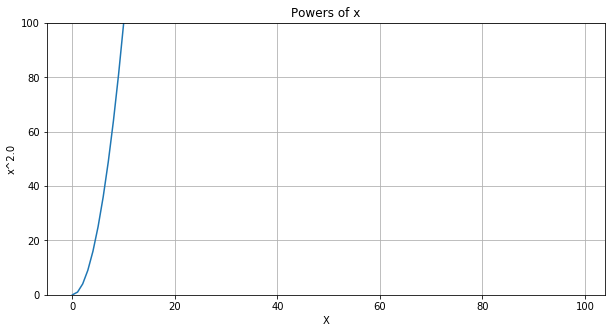

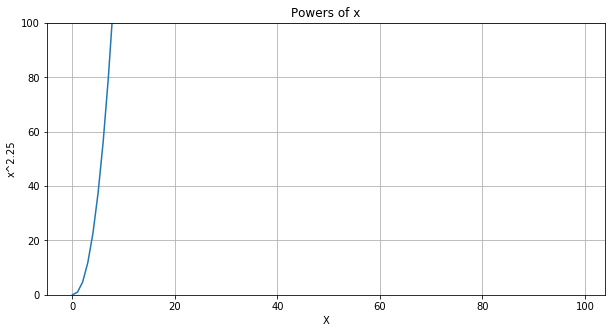

In [693]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import imageio

def plot_for_offset(power, y_max):
    # Data for plotting
    t = np.arange(0.0, 100, 1)
    s = t**power

    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(t, s)
    ax.grid()
    ax.set(xlabel='X', ylabel='x^{}'.format(power),
           title='Powers of x')

    # IMPORTANT ANIMATION CODE HERE
    # Used to keep the limits constant
    ax.set_ylim(0, y_max)

    # Used to return the plot as an image rray
    fig.canvas.draw()       # draw the canvas, cache the renderer
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    return image

kwargs_write = {'fps':30.0, 'quantizer':'nq'}
imageio.mimsave('./powers.gif', [plot_for_offset(i/4, 100) for i in range(10)], fps=10)

SyntaxError: invalid syntax (<ipython-input-20-5f06c9885d62>, line 1)